# **Final Report**
*Jacob Parvin and Axel Fraud*

12/3/2024

#Introduction

For this research project, we dive into the critical issue of password security, a cornerstone of digital privacy and data protection. With cyber threats on the rise and an increasing reliance on online platforms, the need to create secure passwords has never been more urgent. However, despite the obvious risks, millions of users still rely on weak or commonly used passwords, leaving their accounts vulnerable to breaches. We want to addresses this vulnerability by analyzing a dataset of leaked passwords, specifically curated to understand patterns in password strength and to build models that can assess password security with high accuracy.

The dataset used in this project originates from a leak of passwords from 000webhost, a free web hosting service that experienced a major breach. This dataset, available on Kaggle, includes roughly 700,000 passwords and their associated strength levels, which were meticulously classified by three commercial password strength algorithms (Twitter, Microsoft, and Battle). Each password’s strength label was validated by Georgia Tech’s PARS tool, ensuring consistency across multiple scoring systems. This alignment offers a reliable basis for understanding how industry-standard strength meters categorize passwords and provides an essential benchmark for developing machine learning models that predict password strength based on specific character and structural attributes.

The ethical considerations in using leaked passwords are significant. Although the passwords have been anonymized and used purely for research, it remains essential to handle such data responsibly, respecting user privacy and emphasizing the importance of secure password practices. This research does not aim to expose vulnerabilities but rather to support the development of tools that help individuals create stronger passwords. Furthermore, the insights from this project could contribute to password policies across platforms, fostering a safer digital environment.

By deepening our knowledge of password composition and identifying the key attributes that influence password strength, this project can help data scientists and security experts develop predictive tools to classify and assess password quality. This, in turn, may lead to more robust recommendations for users and more adaptive, personalized security measures on platforms worldwide.

Link to Dataset: https://www.kaggle.com/datasets/bhavikbb/password-strength-classifier-dataset/data

#**Data Explanation or Exploration**
The dataset consists of roughly 700,000 password entries, each associated with a strength label: 0 ("weak"), 1 ("medium"), or 2 ("strong"). The original dataset, sourced from a breach of 000webhost, was refined through three password strength meters—Twitter, Microsoft, and Battle—ensuring that each password retained in the dataset was consistently classified across these meters. This filtering process provides a well-validated set of examples across password strength levels, making it ideal for training and validating machine learning models to predict password security.

**Because we are working on this project as a group, we chose to analyze the data in two different ways.**

##**Random Forest and Gradient Boosting Based on Password Attributes:**

###**Key Variables and Features**
Originally, the dataset only contained the password and its respected calculated strength:

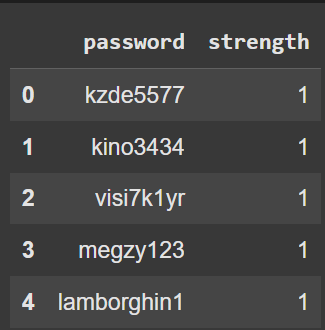

The primary features extracted from each password include:

Character Composition: Counts of uppercase letters, lowercase letters, numbers, and special characters.
Entropy: A calculated measure indicating password complexity, which correlates with unpredictability.
Patterns: Indicators for the presence of common patterns, such as repeated characters or sequences (e.g., "123," "abc"), which often weaken passwords.
These features were engineered to capture essential aspects of password complexity and strength. Given the problem, it's reasonable to expect that longer passwords with a diverse character composition and high entropy will generally correspond to higher strength labels, while short passwords or those with obvious patterns will tend to be weaker.
Length was excluded from the list of features because the models were too dependent on it in predicting the password strength.
After the respective transformations were made the dataset ended up looking like:
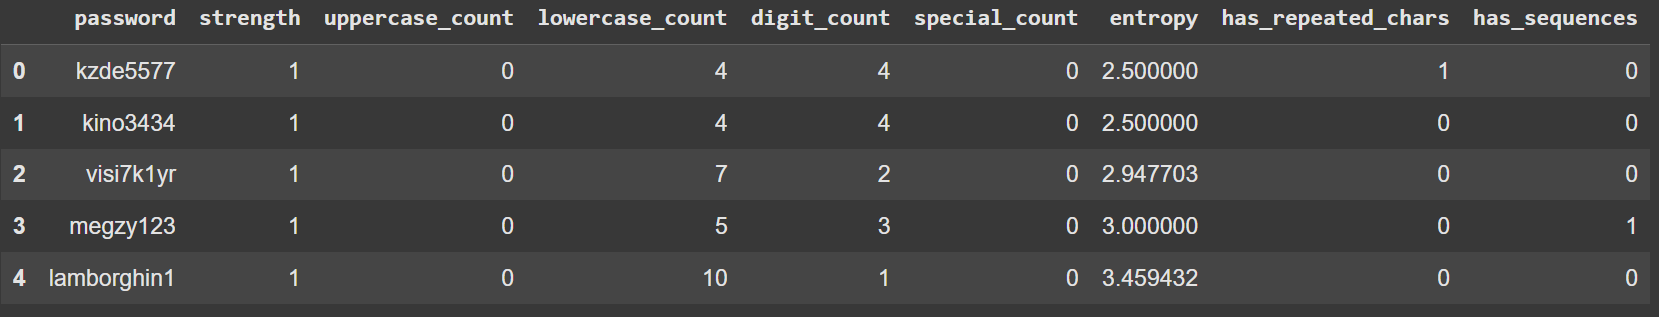
###**Feature Relationships and Collinearity Check**
To ensure that the model does not suffer from redundant information, I checked for collinearity between features. The calculated entropy and pattern indicators add distinct layers of complexity and unpredictability that are essential to predicting password strength accurately. After the models ran, I ran a feature importance test to see which attributes were used the most in the model predictions. It appears that entropy is the most used feature, with uppercase_count, lowercase_count and digit count following closely behind. Special character count is low most likely because not too many of the passwords contained special characters in them. Finally, the repeated characters and sequences are the least used in predicting a password's strength.

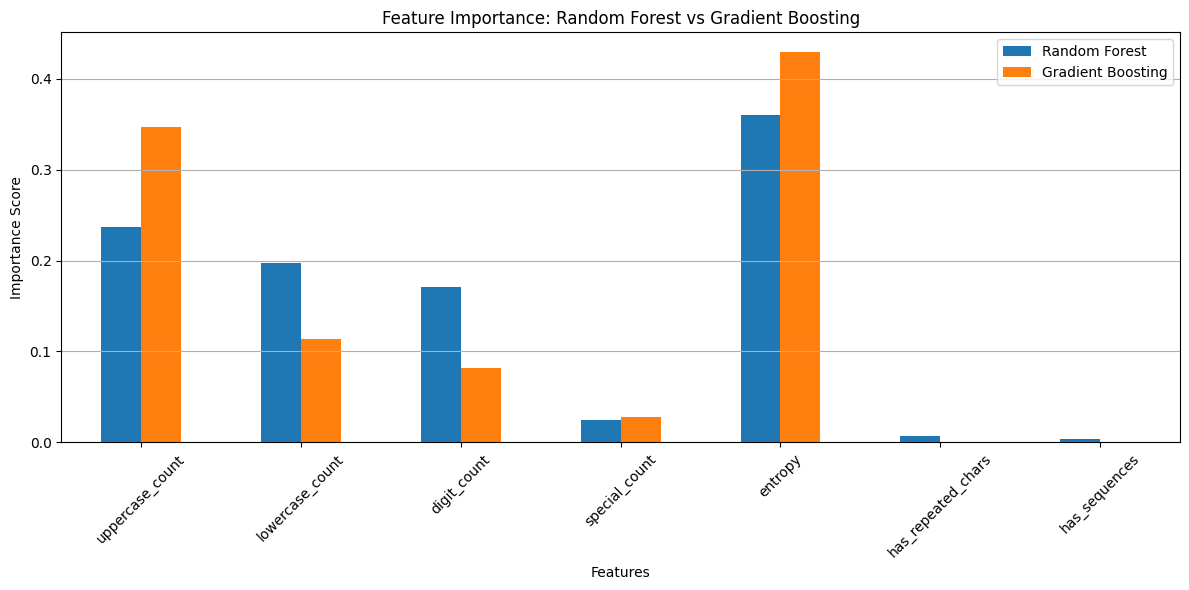

###**Preprocessing and Data Splitting**
To prepare the dataset for model training, the following preprocessing steps were applied:

Data Cleaning: Some rows contained null or non-string values, which were either converted to strings or removed.
Feature Scaling: Normalization was applied to numerical features such as entropy and character counts to help the model converge more effectively during training.
For model training, the data was split into training and testing sets in a 70-30 ratio. This setup allowed for reliable model evaluation without overfitting, as the testing set provided independent assessments of model performance.

## Random Forest and Gradient Boosting Summary

The project explores password strength classification using Random Forest and Gradient Boosting models, both of which are well-suited for tabular data and effective at capturing complex patterns in features such as entropy, character types, and sequences. Random Forest is particularly robust to overfitting due to ensemble learning, while Gradient Boosting excels in handling slightly imbalanced datasets by minimizing errors sequentially. The models were trained on a dataset with features engineered from passwords, including length, counts of uppercase, lowercase, digits, special characters, Shannon entropy, and indicators for repeated characters and sequences. Data was split into 70% training and 30% testing sets to ensure adequate training and evaluation.

Performance metrics, including accuracy, F1-Score, and classification reports, revealed near-perfect results, with Random Forest achieving 99.98% accuracy and Gradient Boosting 99.89%. These results suggest the features effectively distinguish password strength, but the high scores also raise concerns about potential data leakage or overfitting. Validation strategies included classification reports for multiclass predictions, though confusion matrices and further metrics, such as cross-validation or independent test sets, could strengthen the analysis.

While the results are impressive, the exceptionally high accuracy warrants further investigation to ensure the models generalize well to unseen data. Future work should include hyperparameter tuning to optimize performance and testing on independent datasets to validate the models' robustness. These steps will confirm whether the models' success stems from genuine predictive capability or overfitting to specific data patterns.

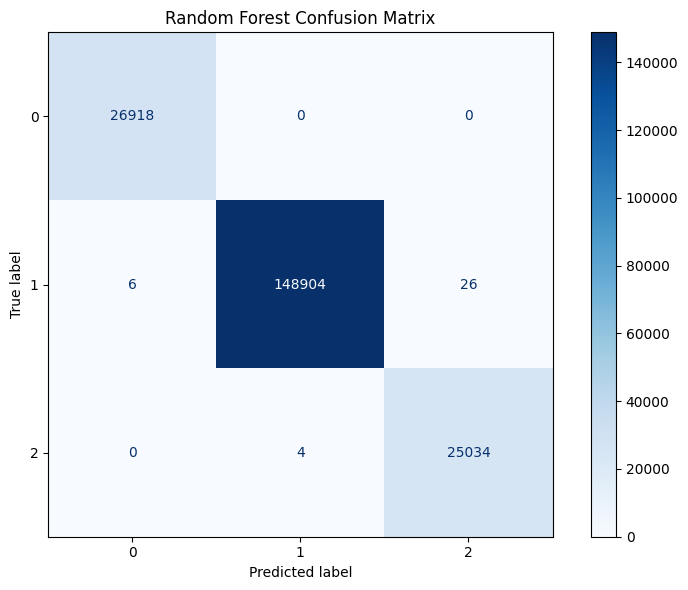
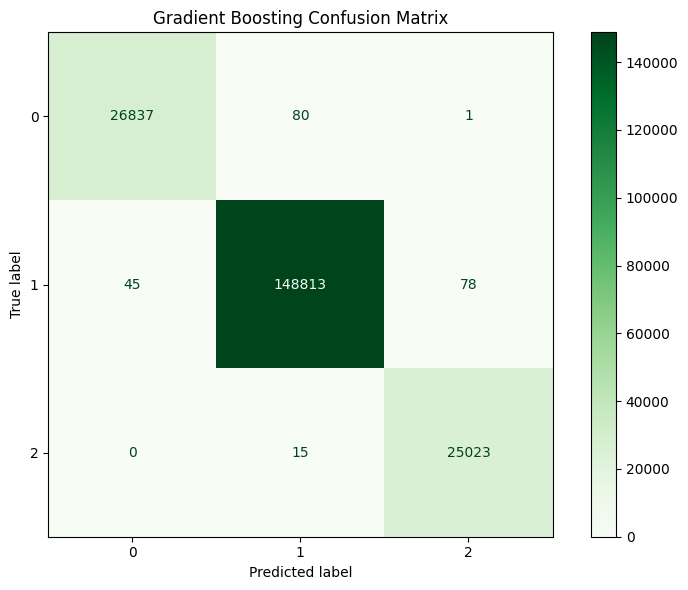



##**Stochastic Gradient Descent (SGD) Classifier, Random Forest, and XGBoost based on TF-IDF features to classify password strength**


###**Key Variables and Features**
For password strength classification, the primary feature set is built from TF-IDF (Term Frequency-Inverse Document Frequency) vectors generated from character n-grams within each password. These TF-IDF features serve as a representation of the frequency and uniqueness of specific character sequences, allowing the model to differentiate between common patterns (often in weaker passwords) and rare, more complex patterns (common in stronger passwords). By capturing both unigrams and bigrams, we provide the model with granular insights into character combinations that contribute to password strength, enhancing the ability to classify passwords based on their inherent structural complexity. Additionally, the dataset labels represent the target variable, with classes corresponding to weak, moderate, and strong passwords.

###**Feature Relationships and Collinearity Check**
In text-based classification tasks like password strength prediction, understanding feature relationships is critical to prevent redundant patterns from overwhelming the model. To assess collinearity, we evaluated the TF-IDF matrix for correlations among high-frequency n-grams. High collinearity between features (e.g., common sequences like “12” and “123”) could lead the model to overemphasize certain patterns without adding unique value. By analyzing the TF-IDF scores for such patterns, we were able to detect and address cases of potential collinearity, ensuring that the feature set provides diverse, non-redundant information. Regularization techniques, such as L2 regularization in linear models, were also considered to further reduce the effect of collinear n-grams on model performance.

###**Preprocessing and Data Splitting**
Preprocessing for this project included converting passwords into TF-IDF feature vectors to create a structured, numerical representation suitable for machine learning models. We standardized and normalized the TF-IDF scores to ensure consistent feature scaling, which is essential for models like SVM and gradient-boosted trees. After preprocessing, the data was split into training and testing sets, typically with an 80-20 split, to allow the model to generalize well to unseen data. This split ensures that the model is exposed to a wide range of patterns in training while retaining a test set to evaluate performance and assess how well the model can classify password strength on new data.

## SVM Model Summary

The **Support Vector Machine (SVM)** with a linear kernel was chosen as an initial model for password strength classification due to its effectiveness with high-dimensional feature spaces, such as those generated by TF-IDF vectorization. SVMs aim to find a hyperplane that maximally separates classes, which works well with text data where classes can often be distinguished by keyword frequency. The linear kernel was selected for simplicity and efficiency, given that it typically performs well on text-based data. The SVM model achieved an accuracy of approximately 82%, providing a solid baseline for comparison. However, it struggled with imbalanced classes, as evidenced by lower precision and recall for the minority class. This limitation likely results from the linear decision boundary, which does not capture the more complex, nonlinear patterns in the data that may be needed for distinguishing between weak and strong passwords. Although SVM provided an effective starting point, it ultimately demonstrated limitations in handling imbalanced datasets and capturing nuanced patterns, suggesting it may best serve as a benchmark model rather than a final solution for complex, imbalanced tasks.

## Random Forest and XGBoost Summary

**Random Forest** and **XGBoost** were selected as ensemble techniques to improve upon the SVM model, with each providing distinct advantages for classification tasks. **Random Forest** aggregates multiple decision trees, each trained on random subsets of the data, reducing the risk of overfitting and creating a more robust classifier. This approach yielded performance comparable to SVM, with the added benefit of fast training time and greater resilience to noise. However, Random Forest showed limitations with imbalanced classes, as it did not fully capture patterns in the minority class, resulting in moderate accuracy and recall.

**XGBoost**, on the other hand, employed gradient boosting, which iteratively corrects the errors of prior trees, and was further optimized with early stopping rounds to prevent overfitting. This method allowed XGBoost to adapt to complex and subtle patterns in the data, achieving the highest accuracy, precision, and recall across all classes, particularly enhancing performance for the minority class. While XGBoost required more computational resources, its iterative nature and ability to handle imbalanced data made it the most effective model in this context. In summary, while **Random Forest** offers a quick and reliable option for balanced datasets, **XGBoost** is recommended for tasks where high accuracy and nuanced pattern recognition are essential, especially in complex or imbalanced datasets.

## Final Reflections and Insights

The project provided valuable insights into the dataset and raised important questions for further exploration. Ensemble models like XGBoost demonstrated the ability to capture nuanced patterns in character usage, outperforming linear models such as SVM, particularly in handling imbalanced datasets. However, challenges in classifying weak passwords highlighted potential limitations in the dataset, suggesting that the diversity of real-world weak passwords may not be fully represented. This limitation points to a need for more comprehensive and diverse datasets to improve generalizability.

The results also raise critical questions about the nature of password datasets and their application in real-world contexts. For instance, how representative is the current dataset of user behaviors across different demographics, industries, and cultural contexts? Incorporating contextual variations in password patterns could enhance model performance. Additionally, integrating features such as password length, entropy, or dictionary-based patterns may provide a richer basis for classification, addressing gaps in capturing structural complexity. Exploring hybrid models, such as combining neural network architectures with traditional classifiers like XGBoost, offers another avenue for improving classification accuracy and interpretability. Lastly, the project prompts consideration of how password strength models can be effectively deployed in practical settings to enhance security policies without compromising user convenience.

Overall, the project not only addressed the challenges of password strength classification but also highlighted opportunities for future research and innovation in this domain.

# Code for Random Forest and Gradient Boosting Based on Password Attributes:

In [ ]:
from google.colab import drive
import os
import pandas as pd
filename = 'data.csv'
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/DSC Projects/') #Change to your final project directory
df = pd.read_csv(filename,on_bad_lines='skip')
df.columns = ['password', 'strength']

Mounted at /content/drive
['output_1.xlsx', 'output_1.xlsx_password_analysis.xlsx', 'password_statistics.csv', 'output_5.xlsx', 'output_3.xlsx', 'output_7.xlsx', 'profanity_en.csv', 'output_6.xlsx', 'output_4.xlsx', 'output_2.xlsx_password_analysis.xlsx', 'output_2.xlsx', 'data_analysis.ipynb', 'Final Project Proposal.gdoc', 'data_password_only.csv', 'passwords.txt', 'cached_lm_GPT2Tokenizer_32_passwords.txt.lock', 'cached_lm_GPT2Tokenizer_32_passwords.txt', 'password_generator', 'wandb', 'NLP.ipynb', 'models', 'data.csv', 'Recurrent Neural Network (RNN).ipynb', 'Password_Strength_Analysis.trialRun.ipynb', 'final_report_draft_instructions.ipynb', 'Final_Report_Draft.ipynb', 'DSC 202 Presentation.gslides', 'DSC 202 Narrative Document.gdoc', 'data_visualizations_202.ipynb', 'Password_Strength_Analysis_ML.ipynb']


In [ ]:
# Ensure all entries in 'password' are strings and drop any rows with missing values in the 'password' column
df['password'] = df['password'].astype(str)
df = df.dropna(subset=['password'])

# Display the first few rows to verify
df.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


In [ ]:
import re
def calculate_entropy(password):
    """Calculate the Shannon entropy of a password."""
    import math
    # Count unique characters in password
    unique_chars = set(password)
    entropy = 0
    for char in unique_chars:
        p_x = password.count(char) / len(password)
        entropy -= p_x * math.log2(p_x)
    return entropy

def password_feature_engineering(df):
    # Look at password statistics
    df['uppercase_count'] = df['password'].apply(lambda x: len(re.findall(r'[A-Z]', x)))
    df['lowercase_count'] = df['password'].apply(lambda x: len(re.findall(r'[a-z]', x)))
    df['digit_count'] = df['password'].apply(lambda x: len(re.findall(r'[0-9]', x)))
    df['special_count'] = df['password'].apply(lambda x: len(re.findall(r'[^a-zA-Z0-9]', x)))
    df['entropy'] = df['password'].apply(calculate_entropy)


    df['has_repeated_chars'] = df['password'].apply(lambda x: int(bool(re.search(r'(.)\1', x))))
    df['has_sequences'] = df['password'].apply(lambda x: int(bool(re.search(r'123|234|345|456|567|678|789|012|abc|bcd|cde|def', x))))

    return df

data_with_features = password_feature_engineering(df)
data_with_features.head()


,password,strength,uppercase_count,lowercase_count,digit_count,special_count,entropy,has_repeated_chars,has_sequences
0,kzde5577,1,0,4,4,0,2.500000,1,0
1,kino3434,1,0,4,4,0,2.500000,0,0
2,visi7k1yr,1,0,7,2,0,2.947703,0,0
3,megzy123,1,0,5,3,0,3.000000,0,1
4,lamborghin1,1,0,10,1,0,3.459432,0,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report

In [ ]:
# Define feature columns and target
features = [ 'uppercase_count', 'lowercase_count', 'digit_count', 'special_count', 'entropy', 'has_repeated_chars', 'has_sequences']
target = 'strength'

# Split the data into train and test sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(468748, 7)
(200892, 7)


In [ ]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions
rf_preds = rf_model.predict(X_test)
gb_preds = gb_model.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_preds)
gb_accuracy = accuracy_score(y_test, gb_preds)

# F1-Score
rf_f1 = f1_score(y_test, rf_preds, average='weighted')
gb_f1 = f1_score(y_test, gb_preds, average='weighted')

# Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_preds))

# If binary classification, calculate AUC
if len(y.unique()) == 2:  # AUC is typically for binary classification
    rf_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    gb_auc = roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1])
    print(f"Random Forest AUC: {rf_auc}")
    print(f"Gradient Boosting AUC: {gb_auc}")

# Summary of results
print(f"Random Forest Accuracy: {rf_accuracy}, F1 Score: {rf_f1}")
print(f"Gradient Boosting Accuracy: {gb_accuracy}, F1 Score: {gb_f1}")

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26918
           1       1.00      1.00      1.00    148936
           2       1.00      1.00      1.00     25038

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26918
           1       1.00      1.00      1.00    148936
           2       1.00      1.00      1.00     25038

    accuracy                           1.00    200892
   macro avg       1.00      1.00      1.00    200892
weighted avg       1.00      1.00      1.00    200892

Random Forest Accuracy: 0.9998207992354101, F1 Score: 0.9998208252655149
Gradient Boosting Accuracy: 0.9989098620154113, F1 Score: 0.9989098997914978


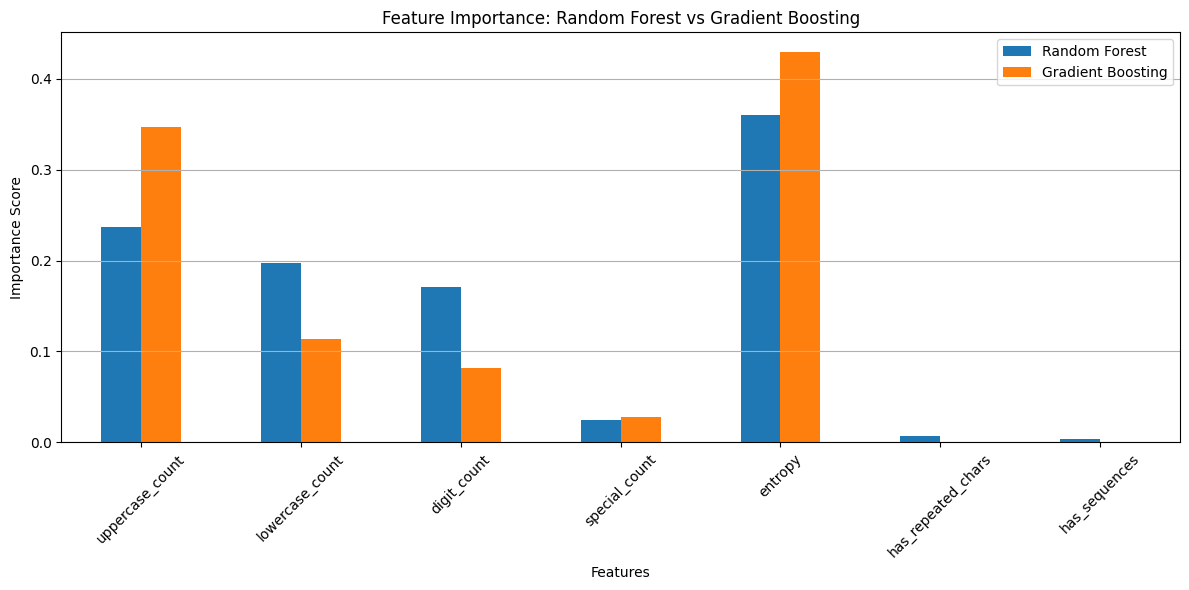

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your features are stored in a list
feature_names = ['uppercase_count', 'lowercase_count', 'digit_count',
                 'special_count', 'entropy', 'has_repeated_chars', 'has_sequences']

# Access feature importances
rf_importances = rf_model.feature_importances_
gb_importances = gb_model.feature_importances_

# Create a DataFrame for easier visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Random Forest': rf_importances,
    'Gradient Boosting': gb_importances
}).set_index('Feature')

# Plot feature importances
feature_importance_df.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Importance: Random Forest vs Gradient Boosting')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


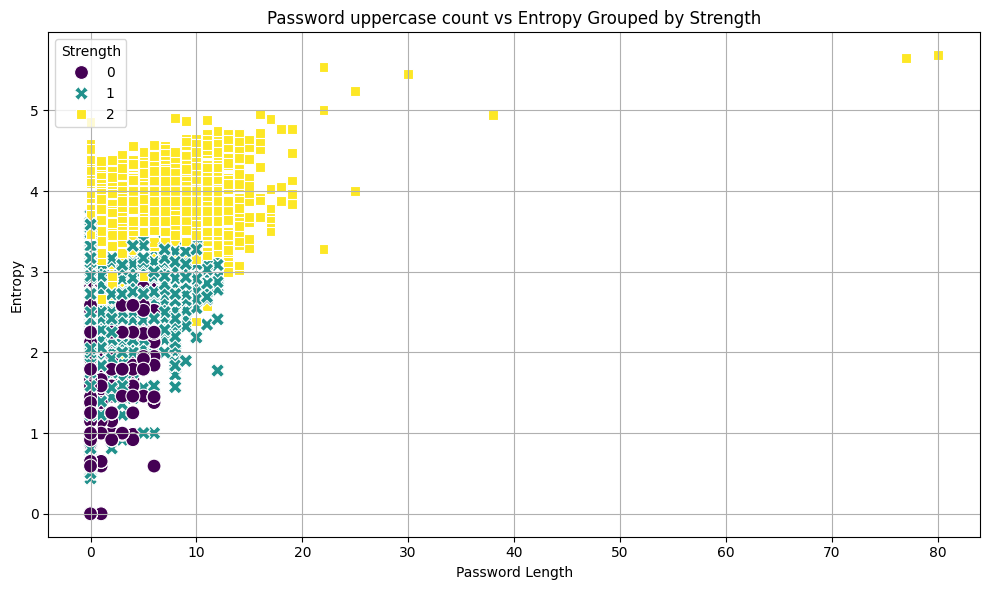

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df_visualization = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_visualization,
    x="uppercase_count",
    y="entropy",
    hue="strength",
    palette="viridis",
    style="strength",
    s=100
)
plt.title("Password uppercase count vs Entropy Grouped by Strength")
plt.xlabel("Password Length")
plt.ylabel("Entropy")
plt.legend(title="Strength", loc="upper left")
plt.grid(True)
plt.tight_layout()

plt.show()

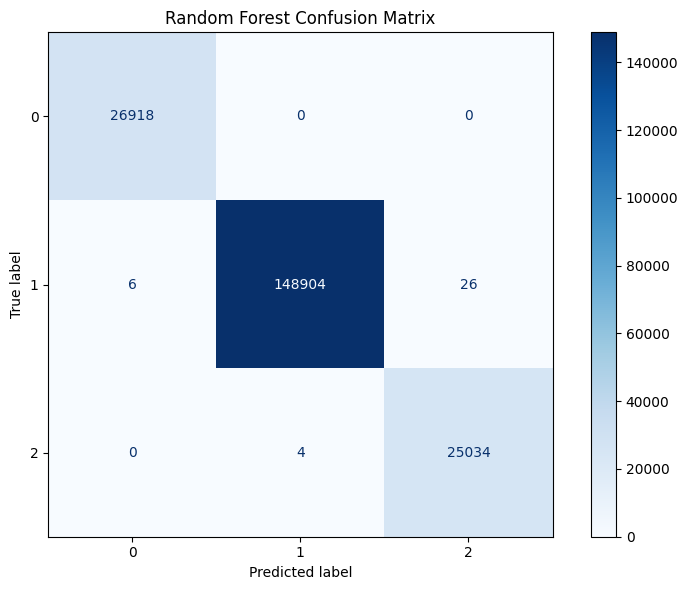

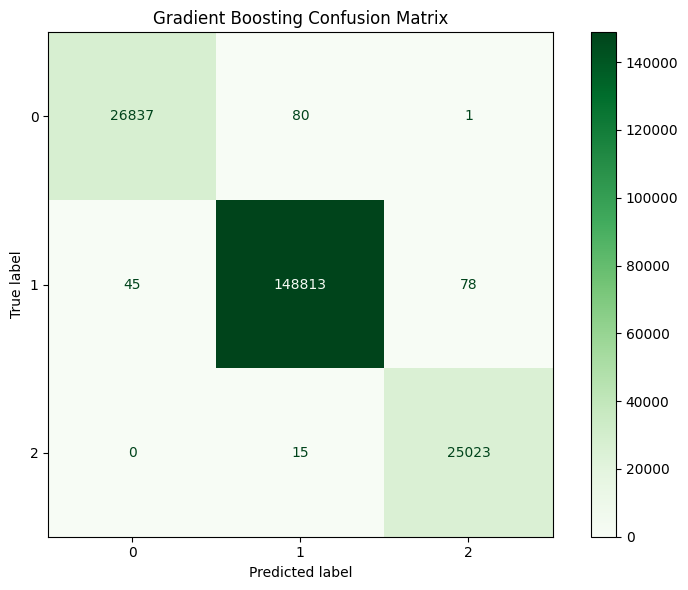

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Random Forest Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_preds)

# Gradient Boosting Confusion Matrix
gb_cm = confusion_matrix(y_test, gb_preds)

# Plot the Random Forest Confusion Matrix
fig, ax_rf = plt.subplots(figsize=(8, 6))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=np.unique(y_test))
disp_rf.plot(cmap="Blues", ax=ax_rf)
plt.title("Random Forest Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

# Plot the Gradient Boosting Confusion Matrix
fig, ax_gb = plt.subplots(figsize=(8, 6))
disp_gb = ConfusionMatrixDisplay(confusion_matrix=gb_cm, display_labels=np.unique(y_test))
disp_gb.plot(cmap="Greens", ax=ax_gb)
plt.title("Gradient Boosting Confusion Matrix")
plt.grid(False)
plt.tight_layout()
plt.show()

# Code for Stochastic Gradient Descent (SGD) Classifier, Random Forest, and XGBoost based on TF-IDF features to classify password strength

In [ ]:
# Import libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import string

# Load the dataset
data = pd.read_csv('data.csv', on_bad_lines='skip')
data.head(10)

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1
5,AVYq1lDE4MgAZfNt,2
6,u6c8vhow,1
7,v1118714,1
8,universe2908,1
9,as326159,1


### Text Preprocessing
We will:
- Convert passwords to lowercase (optional)
- Remove any unwanted characters (although most passwords only contain alphanumeric and special characters)
- Tokenize passwords into characters
- Pad or truncate passwords to ensure consistent length

In [ ]:
# Convert passwords to lowercase (optional)
data['password'] = data['password'].str.lower()

# Function to preprocess text and handle non-string values
def preprocess_text(password):
    if isinstance(password, str):  # Only process if the input is a string
        return ''.join([ch for ch in password if ch in string.printable])
    else:
        return ""  # Return an empty string for non-string inputs

# Apply the function to the 'password' column
data['password'] = data['password'].apply(preprocess_text)

# Display cleaned data
data.head()

,password,strength
0,kzde5577,1
1,kino3434,1
2,visi7k1yr,1
3,megzy123,1
4,lamborghin1,1


### Feature Extraction with TF-IDF
We use TF-IDF to represent each password by character-level n-grams, capturing the significance of character sequences.

In [ ]:
# Extract TF-IDF features for character n-grams
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(data['password'])
y = data['strength']

# Display shape of the features
print("TF-IDF matrix shape:", X_tfidf.shape)

TF-IDF matrix shape: (669640, 71596)


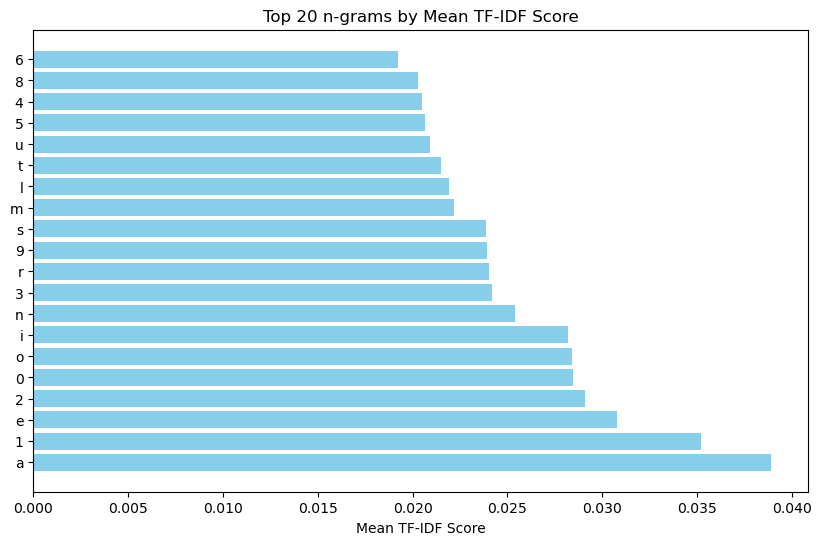

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the data (assuming data.csv is already prepared)
data = pd.read_csv('data.csv', on_bad_lines='skip')

# Preprocess text
data['password'] = data['password'].astype(str).apply(lambda x: ''.join([ch for ch in x if ch in string.printable]))

# Apply TF-IDF vectorization
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1, 3))
X_tfidf = tfidf.fit_transform(data['password'])

# Extract feature names for visualization purposes
feature_names = tfidf.get_feature_names_out()

# 1. Top N n-grams by Mean TF-IDF Score (without converting to dense format)
mean_tfidf_scores = np.array(X_tfidf.mean(axis=0)).flatten()  # Calculate mean on sparse matrix
top_n = 20
top_n_indices = np.argsort(mean_tfidf_scores)[-top_n:]
top_n_ngrams = [feature_names[i] for i in top_n_indices]
top_n_scores = [mean_tfidf_scores[i] for i in top_n_indices]

# Plot Top N n-grams by Mean TF-IDF score
plt.figure(figsize=(10, 6))
plt.barh(top_n_ngrams, top_n_scores, color='skyblue')
plt.xlabel("Mean TF-IDF Score")
plt.title(f"Top {top_n} n-grams by Mean TF-IDF Score")
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()

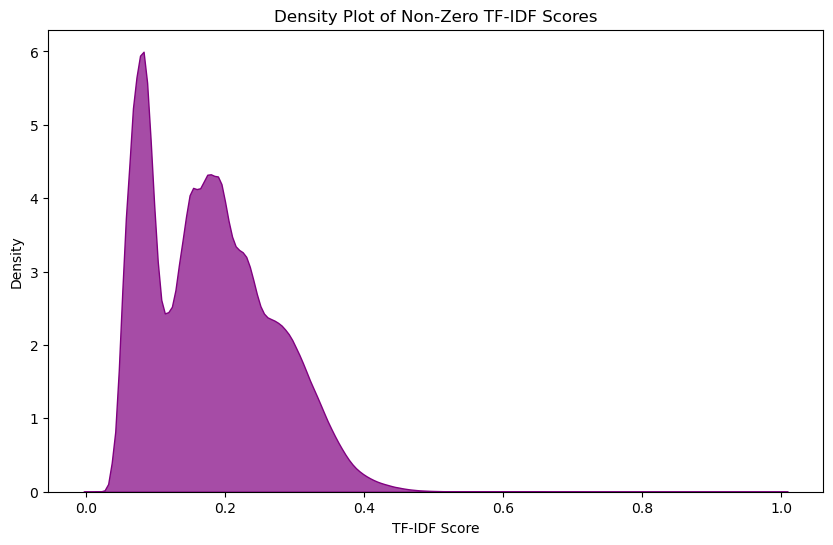

In [ ]:
# Extract non-zero TF-IDF scores directly from the sparse matrix
non_zero_scores = X_tfidf.data  # X_tfidf.data contains only the non-zero values in the sparse matrix

# Plot the density plot of non-zero TF-IDF scores
plt.figure(figsize=(10, 6))
sns.kdeplot(non_zero_scores, color="purple", fill=True, alpha=0.7)
plt.xlabel("TF-IDF Score")
plt.ylabel("Density")
plt.title("Density Plot of Non-Zero TF-IDF Scores")
plt.show()

## 2. SVM Application
In this section, we apply Support Vector Machine (SVM) on the TF-IDF features.
### SVM Explanation:
SVM works well for binary classification by finding a hyperplane that best separates two classes. With TF-IDF character n-grams, SVM can learn meaningful patterns in character combinations.

In [ ]:
# Import necessary libraries
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Step 2: Initialize and train SGD Classifier (an approximation of SVM with a linear kernel)
# Using loss='hinge' with SGDClassifier provides a fast approximation of linear SVM
sgd_model = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
sgd_model.fit(X_train, y_train)

# Step 3: Make predictions and evaluate
sgd_predictions = sgd_model.predict(X_test)

print("SGD Classifier Accuracy:", accuracy_score(y_test, sgd_predictions))
print("Classification Report:\n", classification_report(y_test, sgd_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_predictions))

SGD Classifier Accuracy: 0.8202541664177767
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.00      0.00     17833
           1       0.81      1.00      0.89     99525
           2       0.96      0.65      0.77     16570

    accuracy                           0.82    133928
   macro avg       0.79      0.55      0.56    133928
weighted avg       0.80      0.82      0.76    133928

Confusion Matrix:
 [[   13 17750    70]
 [    9 99113   403]
 [    0  5841 10729]]


In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Reduce dimensionality of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(analyzer='char', ngram_range=(1, 2), max_features=5000)
X_tfidf = tfidf.fit_transform(data['password'])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)
rf_model.fit(X_train, y_train)

# Random Forest evaluation
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Classification Report (Random Forest):\n", classification_report(y_test, rf_predictions))
print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, rf_predictions))

# XGBoost Model using DMatrix and cross-validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define parameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': len(set(y)),  # Number of classes in y
    'eval_metric': 'mlogloss',
    'seed': 42
}

# Use cross-validation for early stopping
cv_results = xgb.cv(
    params,
    dtrain,
    num_boost_round=100,
    early_stopping_rounds=10,
    nfold=5,
    metrics='mlogloss',
    as_pandas=True,
    seed=42
)

# Train final model with best number of boosting rounds
best_num_rounds = cv_results.shape[0]
xgb_model = xgb.train(params, dtrain, num_boost_round=best_num_rounds)

# Make predictions with the final model
xgb_predictions = xgb_model.predict(dtest)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report (XGBoost):\n", classification_report(y_test, xgb_predictions))
print("Confusion Matrix (XGBoost):\n", confusion_matrix(y_test, xgb_predictions))

Random Forest Accuracy: 0.9362717280927065
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.92      0.71      0.80     17833
           1       0.93      0.98      0.96     99525
           2       0.97      0.89      0.93     16570

    accuracy                           0.94    133928
   macro avg       0.94      0.86      0.90    133928
weighted avg       0.94      0.94      0.93    133928

Confusion Matrix (Random Forest):
 [[12578  5253     2]
 [ 1089 97987   449]
 [   25  1717 14828]]
XGBoost Accuracy: 0.9725300161280688
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     17833
           1       0.97      0.99      0.98     99525
           2       0.98      0.97      0.97     16570

    accuracy                           0.97    133928
   macro avg       0.97      0.95      0.96    133928
weighted avg       0.97      0.97      0